In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns;sns.set()
from scipy import stats
%matplotlib inline

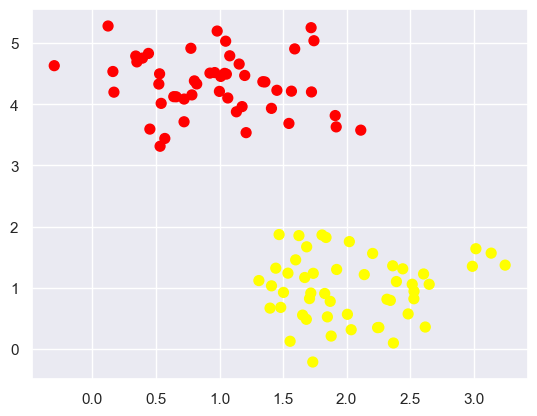

In [2]:
from sklearn.datasets import make_blobs
x,y=make_blobs(n_samples=100,centers=2,random_state=0,cluster_std=0.5)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')


(-1.0, 3.5)

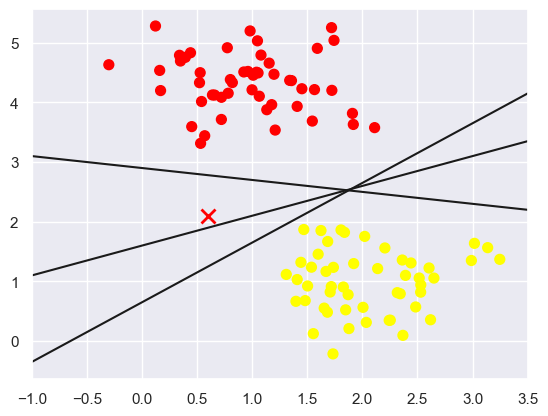

In [3]:
xfit=np.linspace(-1,3.5)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plt.plot([0.6],[2.1],'x',color='red',markeredgewidth=2,markersize=10)
for m,b in [(1,0.65),(0.5,1.6),(-0.2,2.9)]:
 plt.plot(xfit,m*xfit+b,'-k')
plt.xlim(-1,3.5)

# Maximizining the margin

In [5]:
xfit=np.linspace(-1,3.5)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
for m,b,d in [(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
 yfit=m*xfit+b
 plt.plot(xfit,yfit,'-k')
 plt.fill_between(xfit,yfit-d,yfit+d,edgecolor='none',color='#AAAAAA',al)
plt.xlim(-1,3.5)

SyntaxError: positional argument follows keyword argument (2792964312.py, line 6)

# Fitting a SVM from sklearn

In [6]:
from sklearn.svm import SVC
model=SVC(kernel='linear')
model.fit(x,y)
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [9]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
 
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
 
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1],s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

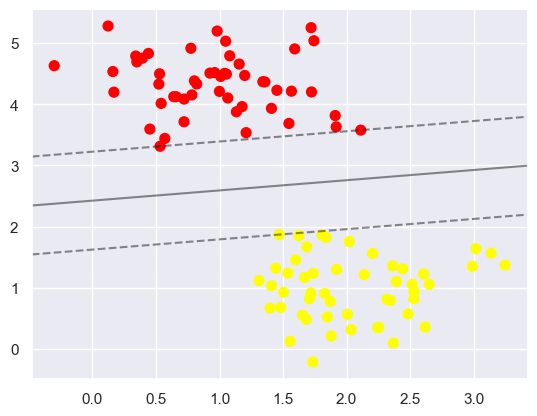

In [10]:
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(model)


In [11]:
model.support_vectors_

array([[0.5323772 , 3.31338909],
       [2.11114739, 3.57660449],
       [1.46870582, 1.86947425]])